# Caso de estudio 1 - House Prices - Advanced Regression Techniques

El propósito de este notebook es pasar por todos los pasos que se deben considerar en el desarrollo de un proyecto de ciencia de datos. En las futuras versiones del portafolio, se utilizarán técnicas de regresión y de feature selection avanzadas como Random Rorest, gradient boosting y enfoques evolutivos para seleccionar la cantidad óptima de predictores. En esta primera versión, se utilizarán algoritmos más simples como regresión lineal y árboles de decisión CART.

## Entendimiento del Negocio/Industria
La industria a la que pertenece el problema planteado es la industria del real estate en diferentes estados de los Estados Unidos. En principio, no tenemos restricciones desde un punto de vista de la explicabilidad del modelo a crear, dado que no estamos involucrándonos en dilemas étiocos al predecir el precio que podría tener una casa. Tampoco tenemos restricciones temporales para las predicciones, dado que el modelo creado no será parte de una aplicación que tenga restricciones de tiempo en esta medida. Además, no existen restricciones de memoria, por lo que en primera instancia, una solución utilizando KNN sería una opción a considerar. 

## Entendimiento y preparación de los Datos
Como el dataset posee muchos predictores (81 contando algunos como Id qeu habría que remover de cualquier forma), como un primer acercamiento ya que en esta oportunidad no utilizaremos PCA, algoritmos genéticos ni ninguna otra estrategia compleja para la selección de atributos, se decidió utilizar los atributos cuya correlación con la variable de salida sea mayor a un umbral. Se seleccionó el umbral de 0,5, pues al seleccionar este umbral, la cantidad de atributos que tienen una correlación mayora a él con la salida son 10. Esta cantidad permitirá hacer un análisis de las distribuciones, valores faltantes y otras tareas de preparación de los datos con un detalle pertinente, dado que es el primer caso de estudio del portafolio. Para los siguientes casos de estudio, se utilizarán técnicas más avanzadas para escoger los predictores.

In [282]:
import pandas as pd

In [283]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [284]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [285]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [286]:
df_correlation =df.corr()["SalePrice"].loc[df.corr()["SalePrice"]>0.5].sort_values()
df_correlation.head(10)

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
Name: SalePrice, dtype: float64

In [287]:
df_neg_correlation =df.corr()["SalePrice"].loc[df.corr()["SalePrice"]<-0.5]
df_neg_correlation.head(10)

Series([], Name: SalePrice, dtype: float64)

In [288]:
df_new = df[["YearRemodAdd","YearBuilt", "TotRmsAbvGrd","FullBath", "1stFlrSF", "TotalBsmtSF", "GarageArea", "GarageCars", "GrLivArea", "OverallQual","SalePrice"]]
df_new.corr()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
YearRemodAdd,1.000000,0.592855,0.191740,0.439046,0.240379,0.291066,0.371600,0.420622,0.287389,0.550684,0.507101
YearBuilt,0.592855,1.000000,0.095589,0.468271,0.281986,0.391452,0.478954,0.537850,0.199010,0.572323,0.522897
TotRmsAbvGrd,0.191740,0.095589,1.000000,0.554784,0.409516,0.285573,0.337822,0.362289,0.825489,0.427452,0.533723
FullBath,0.439046,0.468271,0.554784,1.000000,0.380637,0.323722,0.405656,0.469672,0.630012,0.550600,0.560664
1stFlrSF,0.240379,0.281986,0.409516,0.380637,1.000000,0.819530,0.489782,0.439317,0.566024,0.476224,0.605852
TotalBsmtSF,0.291066,0.391452,0.285573,0.323722,0.819530,1.000000,0.486665,0.434585,0.454868,0.537808,0.613581
GarageArea,0.371600,0.478954,0.337822,0.405656,0.489782,0.486665,1.000000,0.882475,0.468997,0.562022,0.623431
GarageCars,0.420622,0.537850,0.362289,0.469672,0.439317,0.434585,0.882475,1.000000,0.467247,0.600671,0.640409
GrLivArea,0.287389,0.199010,0.825489,0.630012,0.566024,0.454868,0.468997,0.467247,1.000000,0.593007,0.708624
OverallQual,0.550684,0.572323,0.427452,0.550600,0.476224,0.537808,0.562022,0.600671,0.593007,1.000000,0.790982


Aunque Las variables elegidas tienen una correlación alta con la salida, algunas de estas también tienenn una corerlación alta entre sí. Será interesante estudiar cómo afecta esta correlación entre los predictores para la regresión lineal, donde se suelen obtener mejores resultados cuando los predictores no están linealmente relacionados. Para evitar esta correlación se podría haber aplicado PCA o, lo que se hará en este caso, se escogerá un predictor para cada par de predictores cuya correlación sea mayor a 0,8. El predictor elegido se removerá, y este será el que tenga menor correlación con la variable de salida.

Estos son:
TotalBsmtSF y 1stFlrSF -> Se elimina 1stFlrSF por su menor correlación con la salida.
GrLivArea y TotRmsAbvGrd -> Se elimina TotRmsAbvGrd por su menor correlación con la salida.
GarageCars y GarageArea -> Se elimina GarageArea por su menor correlación con la salida.

En este caso, todos los predictores anteriormente mencionados no poseían valores nulos por lo que ese factor (en este caso) no tiene un peso a la hora de decidir qué atributos descartar por su alta correlación entre sí.

In [289]:
df_new.isnull().sum(axis = 0)

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

In [290]:
df_lr = df_new.drop(columns=["1stFlrSF","TotRmsAbvGrd", "GarageArea"])
df_lr.head()

,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,2,856,2,1710,7,208500
1,1976,1976,2,1262,2,1262,6,181500
2,2002,2001,2,920,2,1786,7,223500
3,1970,1915,1,756,3,1717,7,140000
4,2000,2000,2,1145,3,2198,8,250000


## Distribuciones y transformaciones acordes

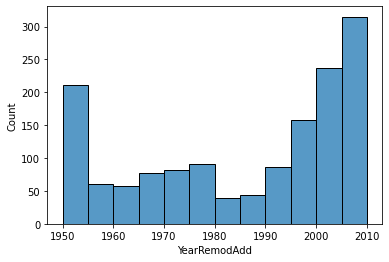

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
# df_lr.hist()
sns.histplot(data=df_lr["YearRemodAdd"])

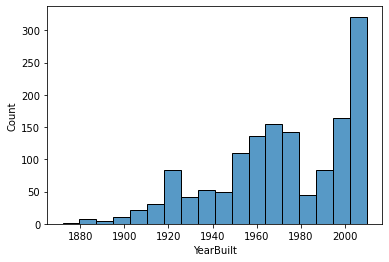

In [292]:
sns.histplot(data=df_lr["YearBuilt"])

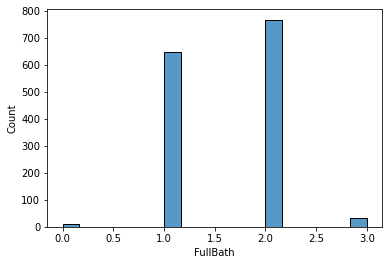

In [293]:
sns.histplot(data=df_lr["FullBath"])

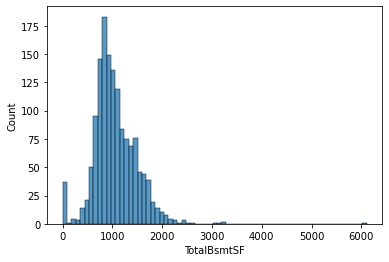

In [294]:
sns.histplot(data=df_lr["TotalBsmtSF"])

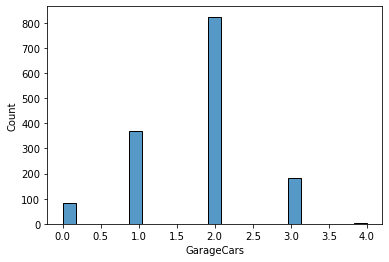

In [295]:
sns.histplot(data=df_lr["GarageCars"])

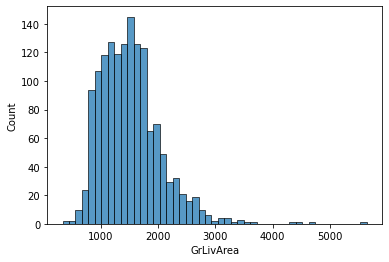

In [296]:
sns.histplot(data=df_lr["GrLivArea"])

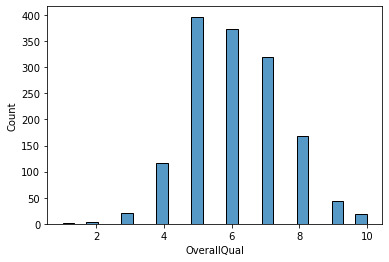

In [297]:
sns.histplot(data=df_lr["OverallQual"])

## Indicios sobre las distribuciones
Se puede ver que YearRemodAdd y más claramente YearBuilt tienen distribuciones sesgadas hacia la derecha, mientras que GrLivArea tiene un sesgo hacia la izquierda. A continuación utilizaremos las transformación de Box-Cox y logarítmica para transformar las distribuciones de dichos atributos tal que estas se asemejen más a una distribución gaussiana. Se recomienda que los predictores posean una distribución gaussiana cuando se utiliza regresión lineal. Por esta razón, estamos aplicando las transformaciones.

GrLivArea y TotalBsmtSF poseen outliers para valores mayores a 4000 y 3000 pies cuadrados respectivamente. Se decide eliminarlos


In [298]:
from scipy import stats
import numpy as np

print(f'El sesgo de YearRemodAdd es: {df_lr["YearRemodAdd"].skew()}')
print(f'El sesgo de YearBuilt es: {df_lr["YearBuilt"].skew()}')
print(f'El sesgo de GrLivArea antes de la eliminación de outliers es: {df_lr["GrLivArea"].skew()}')
print(f'El sesgo de TotalBsmtSF antes de la eliminación de outliers es: {df_lr["TotalBsmtSF"].skew()}')



El sesgo de YearRemodAdd es: -0.5035620027004709
El sesgo de YearBuilt es: -0.613461172488183
El sesgo de GrLivArea antes de la eliminación de outliers es: 1.3665603560164552
El sesgo de TotalBsmtSF antes de la eliminación de outliers es: 1.5242545490627664


In [299]:
box_cox_yearB = stats.boxcox(df["YearBuilt"])[0]
pd.Series(box_cox_yearB).skew()
print(f"El sesgo de YearBuilt luego de la transformación es: {pd.Series(box_cox_yearB).skew()}")

El sesgo de YearBuilt luego de la transformación es: -0.13492200545572358


In [300]:
## Se remueven los outliers mencionados
df_lr = df_lr.loc[df_lr["GrLivArea"]<4000]
df_lr = df_lr.loc[df_lr["TotalBsmtSF"]<3000]

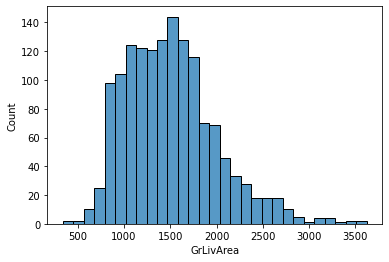

In [301]:
sns.histplot(data=df_lr["GrLivArea"])

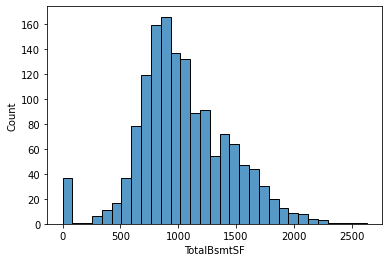

In [302]:
sns.histplot(data=df_lr["TotalBsmtSF"])

In [303]:
# Se realizan las transformaciones

log_yearB = np.log((df_lr["YearBuilt"]))
df_lr["YearBuilt"] = pd.Series(log_yearB)

log_yearR = np.log(df_lr["YearRemodAdd"])
df_lr["YearRemodAdd"] = pd.Series(log_yearR)

box_cox_GrLiv = stats.boxcox(df_lr["GrLivArea"])[0]
df_lr["GrLivArea"] = pd.Series(box_cox_GrLiv)


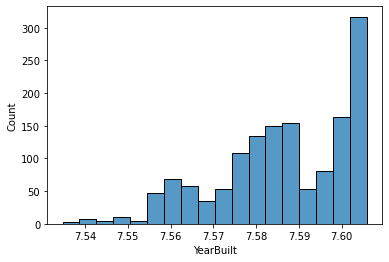

In [304]:
sns.histplot(data=df_lr["YearBuilt"])

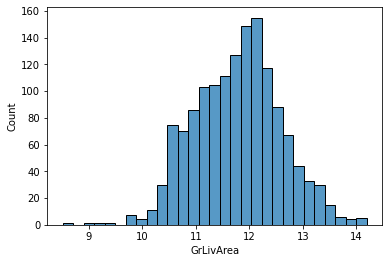

In [305]:
sns.histplot(data=df_lr["GrLivArea"])

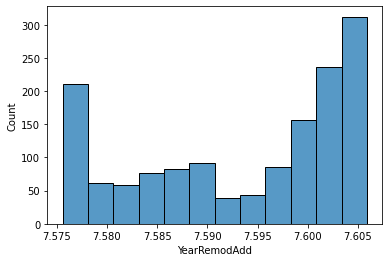

In [306]:
sns.histplot(data=df_lr["YearRemodAdd"])

In [307]:
df_lr.head()

,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,SalePrice
0,7.602401,7.602401,2,856,2,12.219734,7,208500
1,7.588830,7.588830,2,1262,2,11.470805,6,181500
2,7.601902,7.601402,2,920,2,12.329257,7,223500
3,7.585789,7.557473,1,756,3,12.229999,7,140000
4,7.600902,7.600902,2,1145,3,12.860244,8,250000


In [314]:
print(df_lr.isnull().sum(axis = 0))
#Imputamos con mediana

df_lr["GrLivArea"] = df_lr["GrLivArea"].fillna(df_lr["GrLivArea"].median())
df_lr.isnull().sum(axis = 0)

YearRemodAdd    0
YearBuilt       0
FullBath        0
TotalBsmtSF     0
GarageCars      0
GrLivArea       7
OverallQual     0
SalePrice       0
dtype: int64


YearRemodAdd    0
YearBuilt       0
FullBath        0
TotalBsmtSF     0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

## Normalizar atributos con transformación Z

In [315]:
normalized_attribute_df=((df_lr-df_lr.mean())/df_lr.std()).drop(columns=["SalePrice"])

In [316]:
normalized_attribute_df.head()

,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual
0,0.880655,1.049605,0.804421,-0.474322,0.318477,0.540515,0.671404
1,-0.419866,0.168141,0.804421,0.537686,0.318477,-0.396144,-0.060991
2,0.832801,0.984720,0.804421,-0.314793,0.318477,0.677491,0.671404
3,-0.711284,-1.868491,-1.024724,-0.723585,1.659771,0.553352,0.671404
4,0.737021,0.952253,0.804421,0.246048,1.659771,1.341577,1.403799


In [317]:

X = normalized_attribute_df.values
y = df_lr['SalePrice'].values



## Modelado y predicciones

In [325]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,
random_state=42, shuffle=True)

In [337]:
lr = LinearRegression()
lr = lr.fit(train_X, train_y)

In [338]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lr.predict(test_X)
print("Predicted vs Expected")
print(y_pred[0:10])
print(test_y[0:10])
#errors = mean_squared_error(test_y, y_pred)
errors = mean_absolute_error(test_y, y_pred)
print(f"El error medio  es: {errors}")

Predicted vs Expected
[106780.14678697 125108.73627117 189725.33944421 223662.37151484
 -61136.88785589  63126.88706668 172453.7363607  113439.58072217
 260723.77128483  55895.0454893 ]
[110000 135000 136905 222500  39300  75500 172500 127000 270000  34900]
El error medio cuadrado es: 25610.295939317297


In [339]:
regression_tree =DecisionTreeRegressor(max_depth=5)
regression_tree = regression_tree.fit(train_X, train_y)

In [340]:
y_pred = regression_tree.predict(test_X)
print("Predicted vs Expected")
print(y_pred[0:10])
print(test_y[0:10])
#errors = mean_squared_error(test_y, y_pred)
errors = mean_absolute_error(test_y, y_pred)
print(f"El error medio  es: {errors}")

Predicted vs Expected
[125458.52736318 141572.22340426 162885.         207545.72611465
  95934.44871795  95934.44871795 183706.95275591 125458.52736318
 277773.07692308  95934.44871795]
[110000 135000 136905 222500  39300  75500 172500 127000 270000  34900]
El error medio cuadrado es: 25421.86371919252


In [341]:
#Probando con una altura distinta, se puede ver que los resultados empeoran, probáblemente por un sobreajuste a los datos de entrenamiento.
regression_tree =DecisionTreeRegressor(max_depth=7)
regression_tree = regression_tree.fit(train_X, train_y)

In [342]:
y_pred = regression_tree.predict(test_X)
print("Predicted vs Expected")
print(y_pred[0:10])
print(test_y[0:10])
#errors = mean_squared_error(test_y, y_pred)
errors = mean_absolute_error(test_y, y_pred)
print(f"El error medio es: {errors}")

Predicted vs Expected
[126150.11764706 150436.06521739 180875.         207575.71818182
  51770.33333333 109985.41666667 171273.38356164 126150.11764706
 268233.33333333  95280.5       ]
[110000 135000 136905 222500  39300  75500 172500 127000 270000  34900]
El error medio cuadrado es: 26233.039961060247


In [349]:
df_results = pd.DataFrame({"test_y":test_y,"predicted_y":y_pred})
df_results["relative_pred"] = (df_results["predicted_y"]/df_results["test_y"])
df_results.head(15)

,test_y,predicted_y,relative_pred
0,110000,126150.117647,1.146819
1,135000,150436.065217,1.114341
2,136905,180875.000000,1.321172
3,222500,207575.718182,0.932925
4,39300,51770.333333,1.317311
5,75500,109985.416667,1.456760
6,172500,171273.383562,0.992889
7,127000,126150.117647,0.993308
8,270000,268233.333333,0.993457
9,34900,95280.500000,2.730100


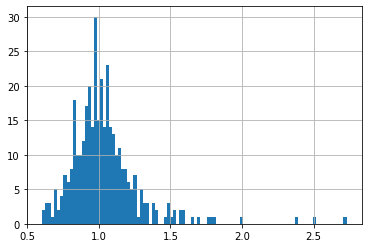

In [348]:
df_results["relative_pred"].hist(bins=100)


## Conclusiones
Con una media de 180000, un error medio de alrededor de 25000 no es tan malo como había pensado inicialmente. Igualmente, no es un buen resultado.
Probáblemente la simplificación de tomar una cantidad pequeña de atributos debido a su correlación con la variable de salida haya influido en estos no tan buenos resultados. Tampoco se incluyeron variables categóricas, lo que podría haber mejorado las predicciones.

Igualmente, podemos ver que lo más común es que nuestro árbol de regresión prediga relativamente parecido a el precio real de una casa, como se puede ver en la distribución de arriba.